# Implement a Feed-Forward-Network

In [1]:
# 9.03.2021

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

### 1. Creating some training data

In [24]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [4]:
X.shape, y.shape

((50, 2), (50,))

### 2. Making a scatterplot of the 2 columns of X data and coloring the data points according to the labels (y)

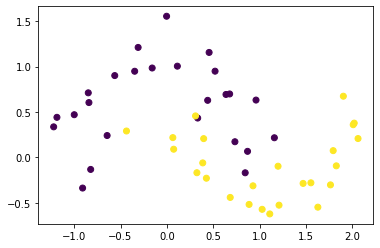

In [5]:
plt.scatter(X[:,0], X[:,1], c = y);

### 3. "horizontally stack” an extra column for the bias

In [7]:
def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

In [8]:
X = add_bias(X)
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

In [9]:
X.shape

(50, 3)

### 4. Sigmoid function

In [10]:
def sigmoid(X):  
    return np.exp(-np.logaddexp(0, -X))

### 5. Random weights

In [12]:
weights_1 = np.random.rand(3, 2) # hidden
weights_2 = np.random.rand(3, 1) # output

In [13]:
print(X.shape, weights_1.shape, weights_2.shape)

(50, 3) (3, 2) (3, 1)


### 6. Feed-Forward Network

In [14]:
def feed_forward(X, weights_hidden, weights_output):
    ''' STEP 1. calculate the dot product of X
    (shape of (50,3))
    and the weights of the first layer
    (shape of (3, 2))
    this results in an output shape of (50, 2)'''
    
    step1 = np.dot(X, weights_hidden)
    
    ''' STEP 2. apply the sigmoid function on the result
    (applying the sigmoid function on a 50x2 matrix outputs the same shape.
    '''
    step2 = sigmoid(step1)
    
    ''' STEP 3. append an extra 1 for the bias to the result
    (this results in a 50x3 matrix)'''
    step3 = add_bias(step2)
    
    ''' STEP 4. calculate the dot product of X (from step 3)
    (shape of (50, 3))
    and the weights of the second layer
    (shape of (3, 1)). This results in an output shape of (50, 1)'''
    step4 = np.dot(step3, weights_output)
    
    ''' STEP 5. apply the sigmoid function on the result'''
    step5 = sigmoid(step4)
    
    return step2, step5

In [15]:
out1, out2 = feed_forward(X, weights_1, weights_2)
yhat = out1

### 7. Loss Function

In [17]:
def log_loss(ytrue, yhat):   
    np.seterr(divide = 'ignore')
    loss = -(ytrue * np.log(yhat) + (1 - ytrue) * np.log(1 - yhat))
    return loss

### Get Initial Loss

In [18]:
out1, out2 = feed_forward(X, weights_1, weights_2)
yhat = out2
hidden_output = out1
ytrue = y.reshape(-1, 1)

log_loss(ytrue, yhat)

array([[1.68706519],
       [0.22999359],
       [0.21601921],
       [0.20053773],
       [1.61766317],
       [0.1893413 ],
       [0.22474962],
       [0.22715303],
       [0.2290149 ],
       [1.5724678 ],
       [1.70277213],
       [1.71277156],
       [0.2135004 ],
       [1.71781559],
       [1.655476  ],
       [1.65971143],
       [0.21858002],
       [0.19267156],
       [0.19305242],
       [1.65644477],
       [1.70445785],
       [1.6993715 ],
       [1.47165866],
       [0.23158381],
       [0.22416255],
       [1.6225993 ],
       [0.20964549],
       [0.22094825],
       [0.22975831],
       [1.70196563],
       [0.21069308],
       [1.73060553],
       [0.22291581],
       [1.65201042],
       [1.54361717],
       [1.68482892],
       [0.2120715 ],
       [0.23048652],
       [1.50777616],
       [0.22494139],
       [1.7387403 ],
       [1.56037937],
       [1.60522168],
       [0.19510712],
       [1.57747137],
       [1.68561607],
       [0.20374616],
       [1.673

### 8. Backpropagation

In [19]:
def backprop(weights, output1, output2, ytrue, X, LR):

    wH = weights[0]
    wO = weights[1]
    
    '''EQUATION A: error=(y^−ytrue)×loss'''
    error = (yhat - ytrue) * log_loss(ytrue , yhat)

    '''EQUATION B: ∇y=act′(Ho⋅ωo)×error'''
    hidden_out_with_bias = add_bias(hidden_output)
    #don't forget the bias!
    sig_deriv = yhat * ( 1 - yhat)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:Δωo=−(∇y⋅Ho)×LR'''
    delta_wo = -np.dot( y_grad.T, hidden_out_with_bias ) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''EQUATION D:∇H=act′(X⋅ωh)×(∇y⋅ωo)'''
    sig_deriv_2 = hidden_out_with_bias * ( 1 - hidden_out_with_bias)
    H_grad = sig_deriv_2[:,:2]  * np.dot(y_grad , wO[:-1].T)
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    #assert H_grad.shape == (50, 2)

    '''EQUATION E: Δωh=−(∇H⋅X)×LR'''
    delta_wH = -np.dot(H_grad.T, X) * LR
    #X = add_bias(X)
    wH_new = wH + delta_wH.T
    #old weights + delta weights -> new weights!

    # new hidden weights, new output weights
    return wH_new, wO_new

### Run the Backpropagation Algorithm

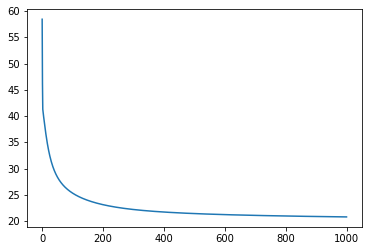

In [23]:
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train
LOSS_VEC = []
LR = 0.1

for i in range(1000):
    out1, out2 = feed_forward(X, weights[0], weights[1])
    yhat = out2
    loss = log_loss(ytrue, yhat).sum()
    LOSS_VEC.append(loss)
    
    new_weights = backprop(weights, out1, out2, ytrue, X, LR)
    weights = new_weights

plt.plot(LOSS_VEC);